<a href="https://colab.research.google.com/github/ChiragShetye/Business-Case-AdEase/blob/main/Business_Case_Study_AdEase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
import re
from locale import normalize
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
!pip install pystan~=2.14
!pip install fbprophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl


In [39]:
!gdown 'https://drive.google.com/uc?export=download&id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl' -O train_1.csv
!gdown 'https://drive.google.com/uc?export=download&id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE' -O Exog_Campaign_eng.csv

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?export=download&id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=c26cbb84-3e57-4c5f-acad-c4fd3addecc2
To: /content/train_1.csv
100% 278M/278M [00:01<00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng.csv
100% 1.10k/1.10k [00:00<00:00, 3.02MB/s]


In [3]:
# train csv file
exog = pd.read_csv('Exog_Campaign_eng.csv')
print("train_1 Head:")
print(exog.head())

# Exogineous variable for our analysis
df = pd.read_csv('train_1.csv')
print("\Exogineous variable Head:")
print(df.head())

train_1 Head:
   Exog
0     0
1     0
2     0
3     0
4     0
\Exogineous variable Head:
                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN        

In [4]:
exog.sample(10)

,Exog
212,0
494,0
171,0
387,1
299,0
269,0
390,1
42,0
194,1
459,0


In [5]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [6]:
exog.describe()

,Exog
count,550.000000
mean,0.098182
std,0.297831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
exog.isnull().sum()

,0
Exog,0


In [8]:
exog.shape

(550, 1)

In [9]:
df.sample(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
12588,Philip_Hammond_en.wikipedia.org_desktop_all-ag...,232.0,231.0,142.0,141.0,144.0,176.0,218.0,226.0,324.0,...,278.0,212.0,203.0,147.0,189.0,278.0,301.0,272.0,210.0,191.0
41100,Felicity_Jones_en.wikipedia.org_all-access_all...,3004.0,2969.0,3184.0,4027.0,4366.0,4364.0,3866.0,3809.0,3488.0,...,56804.0,57644.0,55503.0,43883.0,57025.0,66321.0,65175.0,57970.0,49516.0,40928.0
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
25462,Tour_de_France_fr.wikipedia.org_all-access_all...,1596.0,2089.0,3591.0,6487.0,5636.0,8697.0,6960.0,5848.0,5936.0,...,267.0,298.0,288.0,323.0,371.0,378.0,455.0,528.0,1111.0,1278.0
90726,Drake_(rapero)_es.wikipedia.org_all-access_all...,471.0,471.0,448.0,431.0,455.0,544.0,497.0,468.0,468.0,...,216.0,213.0,177.0,138.0,196.0,188.0,545.0,479.0,435.0,426.0


In [10]:
df.isnull().sum()

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


### Splitting and Extracting Components from the 'Page' Column


In [12]:
# Function to split the 'Page' column into multiple parts
def split_page(page):
    w = re.split('_|\.', page)  # Split by underscores and periods
    return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(df['Page'].apply(lambda x: split_page(str(x))))
df_details = pd.DataFrame(li, columns=['Title', 'Language', 'Access_type', 'Access_origin'])
df_new = pd.concat([df.reset_index(), df_details], axis=1)
df_new.sample(5)


,index,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
100681,100681,Твин_Пикс_ru.wikipedia.org_all-access_all-agents,914.0,1005.0,940.0,995.0,1063.0,1017.0,1038.0,1178.0,...,3586.0,2855.0,2395.0,2623.0,2249.0,1583.0,Твин Пикс,ru,all-access,all-agents
43647,43647,Special:MyLanguage/How_to_become_a_MediaWiki_h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,43.0,49.0,52.0,64.0,53.0,Special:MyLanguage/How to become a MediaWiki h...,www,desktop,all-agents
107878,107878,西班牙_zh.wikipedia.org_mobile-web_all-agents,246.0,216.0,220.0,270.0,294.0,256.0,225.0,216.0,...,385.0,353.0,331.0,318.0,327.0,302.0,西班牙,zh,mobile-web,all-agents
68886,68886,21._März_de.wikipedia.org_desktop_all-agents,36.0,30.0,26.0,48.0,35.0,30.0,21.0,28.0,...,16.0,30.0,42.0,34.0,26.0,17.0,21 März,de,desktop,all-agents
9782,9782,Man_with_No_Name_en.wikipedia.org_desktop_all-...,327.0,317.0,300.0,237.0,273.0,333.0,299.0,332.0,...,272.0,373.0,382.0,341.0,375.0,351.0,Man with No Name,en,desktop,all-agents


In [13]:
df_new.shape

(145063, 556)

In [14]:
df_new.isna().sum()

,0
index,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
...,...
2016-12-31,3465
Title,0
Language,0
Access_type,0


In [15]:
df_new.fillna(0,inplace = True)

In [16]:
df_new.isna().sum()

,0
index,0
Page,0
2015-07-01,0
2015-07-02,0
2015-07-03,0
...,...
2016-12-31,0
Title,0
Language,0
Access_type,0


### Mapping Language Codes to Full Language Names

In [17]:
df_new['Language'].unique()

array(['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es'],
      dtype=object)

In [18]:
lang_map = {
    'zh': 'Chinese',
    'fr': 'French',
    'en': 'English',
    'commons': 'Commons',
    'ru': 'Russian',
    'www': 'Global',
    'de': 'German',
    'ja': 'Japanese',
    'es': 'Spanish'
}

In [19]:
df_new['Language'] = df_new['Language'].map(lang_map).fillna('Unknown')

In [20]:
df_new.head()

,index,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,Chinese,all-access,spider
1,1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,Chinese,all-access,spider
2,2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,Chinese,all-access,spider
3,3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,Chinese,all-access,spider
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52 Hz I Love You,Chinese,all-access,spider


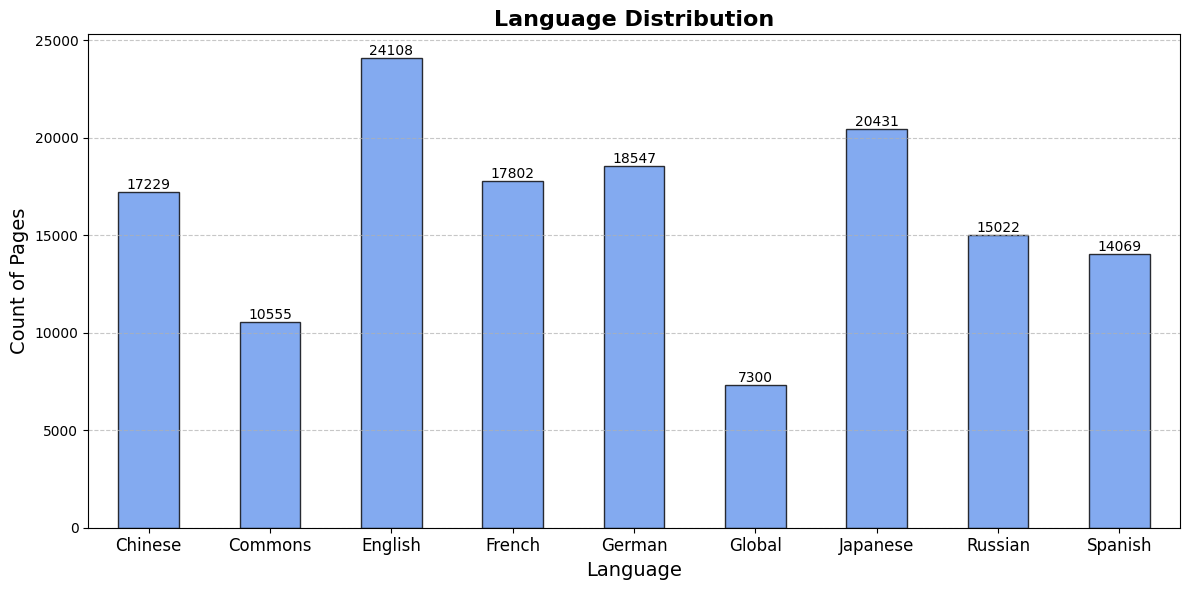

In [21]:
plt.figure(figsize=(12, 6))
ax = df_new.groupby('Language')['Page'].count().plot(
    kind='bar', color='cornflowerblue', edgecolor='black', alpha=0.8
)
plt.title('Language Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=14)
plt.ylabel('Count of Pages', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


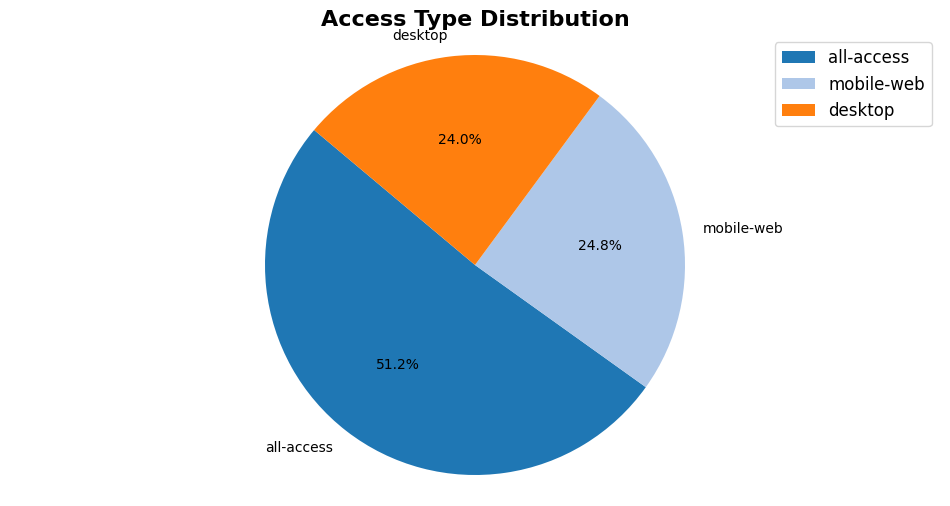

In [22]:
plt.figure(figsize=(12, 6))
access_counts = df_new['Access_type'].value_counts()
plt.pie(
    access_counts,
    labels=access_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Access Type Distribution', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=12)
plt.axis('equal')
plt.show()


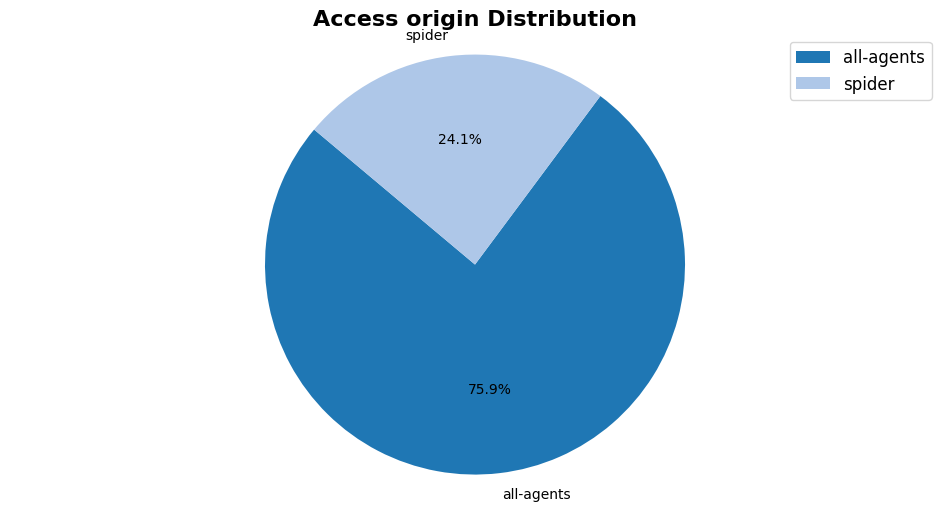

In [23]:
plt.figure(figsize=(12, 6))
access_counts = df_new['Access_origin'].value_counts()
plt.pie(
    access_counts,
    labels=access_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Access origin Distribution', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=12)
plt.axis('equal')
plt.show()


In [24]:
df_new

,index,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,Chinese,all-access,spider
1,1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,Chinese,all-access,spider
2,2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,Chinese,all-access,spider
3,3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,Chinese,all-access,spider
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52 Hz I Love You,Chinese,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,12.0,13.0,3.0,5.0,10.0,Underworld (serie de películas),Spanish,all-access,spider
145059,145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Resident Evil: Capítulo Final,Spanish,all-access,spider
145060,145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Enamorándome de Ramón,Spanish,all-access,spider
145061,145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Hasta el último hombre,Spanish,all-access,spider


In [25]:
# Select the date columns only
date_columns = df_new.columns[1:-4]  # Assuming the last 4 columns are metadata (Title, Language, Access_type, Access_origin)

# Reshape the data: group by 'Language' and sum views for each date
language_views_by_date = (
    df_new.groupby('Language')[date_columns]
    .sum()
    .T  # Transpose the DataFrame to make dates rows and languages columns
    .reset_index()
)

# Rename the columns
language_views_by_date.rename(columns={'index': 'Date'}, inplace=True)

# Display the first few rows of the resulting DataFrame
print(language_views_by_date.head())


Language        Date                                            Chinese  \
0               Page  2NE1_zh.wikipedia.org_all-access_spider2PM_zh....   
1         2015-07-01                                          4144988.0   
2         2015-07-02                                          4151189.0   
3         2015-07-03                                          4123659.0   
4         2015-07-04                                          4163448.0   

Language                                            Commons  \
0         Accueil_commons.wikimedia.org_all-access_spide...   
1                                                 1140821.0   
2                                                 1178130.0   
3                                                 1150547.0   
4                                                  951317.0   

Language                                            English  \
0         !vote_en.wikipedia.org_desktop_all-agents"Awak...   
1                                           

In [26]:
df_clean = language_views_by_date.drop(0).copy()

# Convert the 'Date' column to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Convert all other columns to numeric (in case of any non-numeric values)
for col in df_clean.columns[2:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean.set_index('Date', inplace=True)
# Check the cleaned data
print(df_clean.head())

Language      Chinese    Commons     English     French      German    Global  \
Date                                                                            
2015-07-01  4144988.0  1140821.0  84712190.0  8458638.0  13260519.0  349713.0   
2015-07-02  4151189.0  1178130.0  84438545.0  8512952.0  13079896.0  383680.0   
2015-07-03  4123659.0  1150547.0  80167728.0  8186030.0  12554042.0  325714.0   
2015-07-04  4163448.0   951317.0  83463204.0  8749842.0  11520379.0  308756.0   
2015-07-05  4441286.0  1058036.0  86198637.0  8590493.0  13392347.0  338485.0   

Language      Japanese    Russian     Spanish  
Date                                           
2015-07-01  11863200.0  9463854.0  15278553.0  
2015-07-02  13620792.0  9627643.0  14601013.0  
2015-07-03  12305383.0  8923463.0  13427632.0  
2015-07-04  15456239.0  8393214.0  12606538.0  
2015-07-05  14827204.0  8938528.0  13710356.0  


In [27]:
df_clean

Language,Chinese,Commons,English,French,German,Global,Japanese,Russian,Spanish
Date,,,,,,,,,
2015-07-01,4144988.0,1140821.0,84712190.0,8458638.0,13260519.0,349713.0,11863200.0,9463854.0,15278553.0
2015-07-02,4151189.0,1178130.0,84438545.0,8512952.0,13079896.0,383680.0,13620792.0,9627643.0,14601013.0
2015-07-03,4123659.0,1150547.0,80167728.0,8186030.0,12554042.0,325714.0,12305383.0,8923463.0,13427632.0
2015-07-04,4163448.0,951317.0,83463204.0,8749842.0,11520379.0,308756.0,15456239.0,8393214.0,12606538.0
2015-07-05,4441286.0,1058036.0,86198637.0,8590493.0,13392347.0,338485.0,14827204.0,8938528.0,13710356.0
...,...,...,...,...,...,...,...,...,...
2016-12-27,6478442.0,2305363.0,145628731.0,15281470.0,20125264.0,320017.0,16123301.0,15040168.0,15945353.0
2016-12-28,6513400.0,2599015.0,141278366.0,13781521.0,19152389.0,729836.0,16150715.0,14000319.0,16577375.0
2016-12-29,6042545.0,2309293.0,150557534.0,13399796.0,18447906.0,320695.0,17682688.0,13478977.0,15647135.0


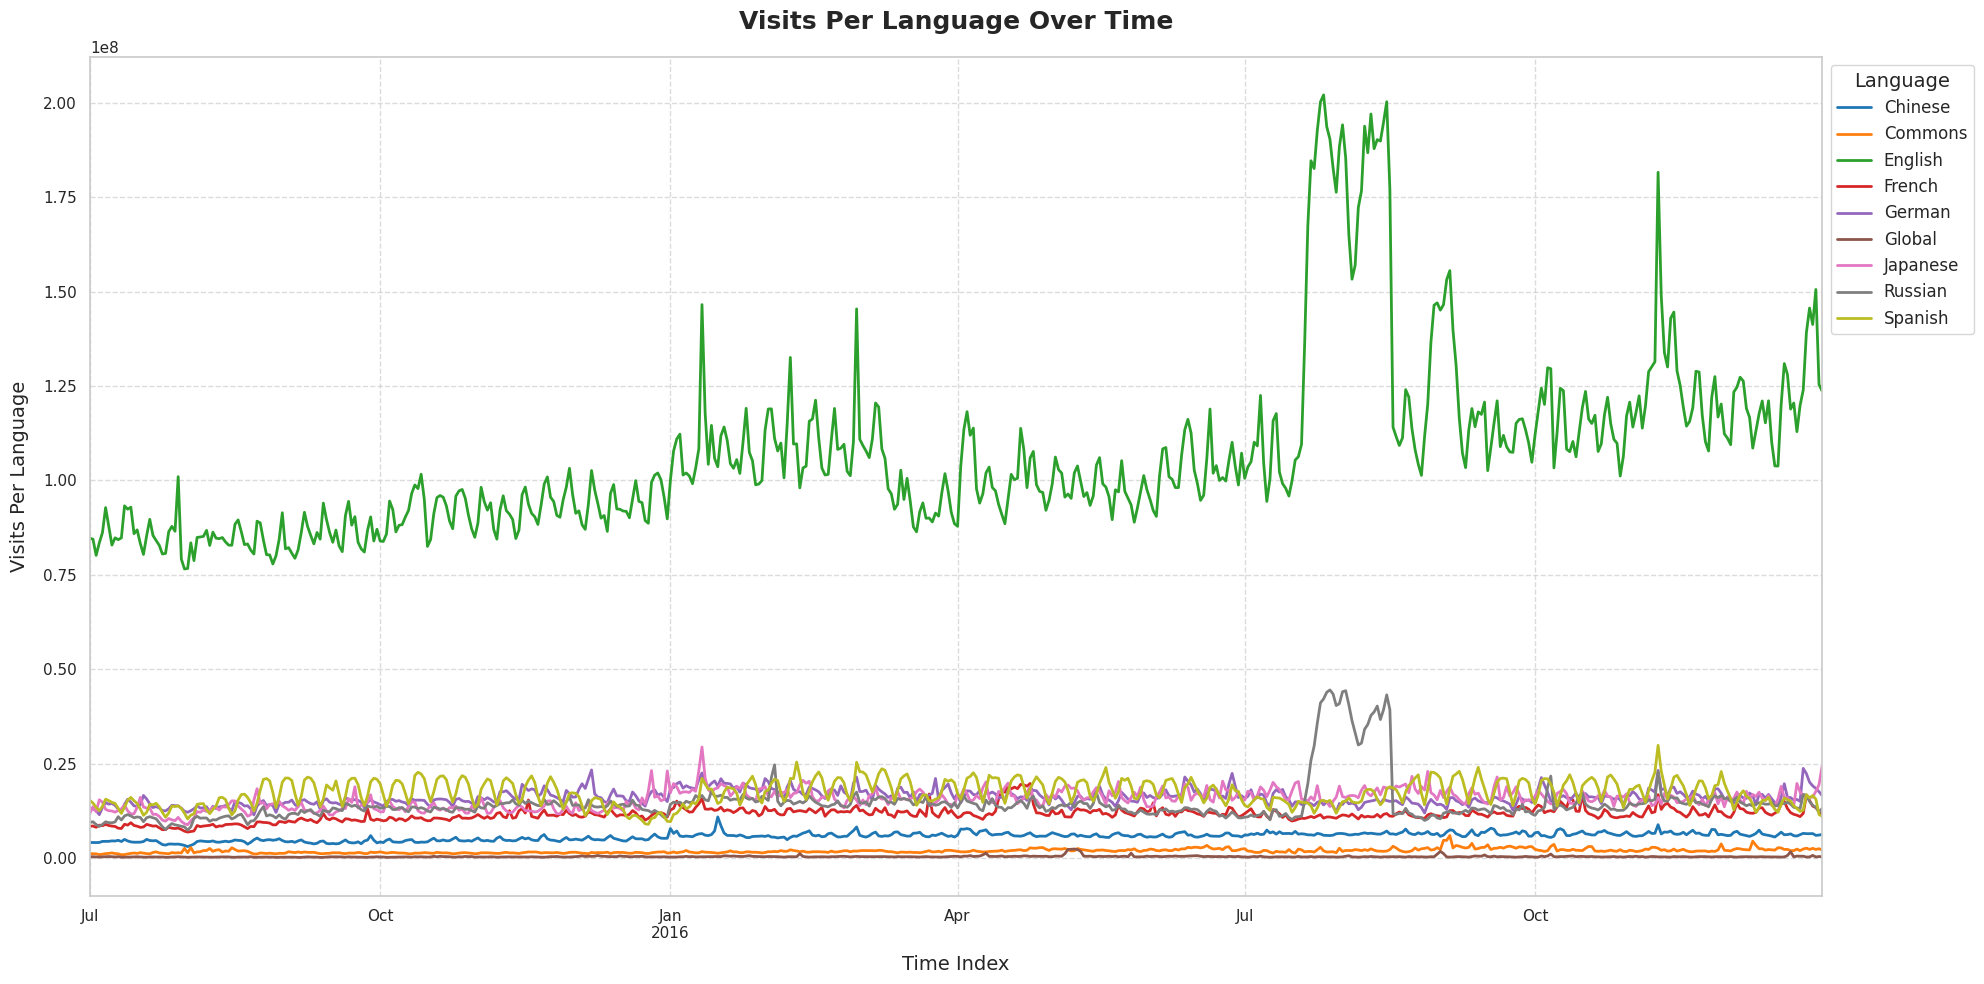

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
color_palette = sns.color_palette("tab10")  # Use Seaborn's tab10 color palette for distinct lines
df_clean.plot(ax=plt.gca(), linewidth=2, color=color_palette)
plt.xlabel("Time Index", fontsize=14, labelpad=10)
plt.ylabel("Visits Per Language", fontsize=14, labelpad=10)
plt.title("Visits Per Language Over Time", fontsize=18, fontweight="bold", pad=20)
plt.xticks(rotation=0)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Language", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [29]:
df_eng = df_clean['English']
df_eng.head(10)

df_eng = df_clean['English'].to_frame().reset_index()

# Rename columns
df_eng.columns = ["date", "views"]

df_eng.set_index('date', inplace=True)

df_eng.head()

,views
date,
2015-07-01,84712190.0
2015-07-02,84438545.0
2015-07-03,80167728.0
2015-07-04,83463204.0
2015-07-05,86198637.0


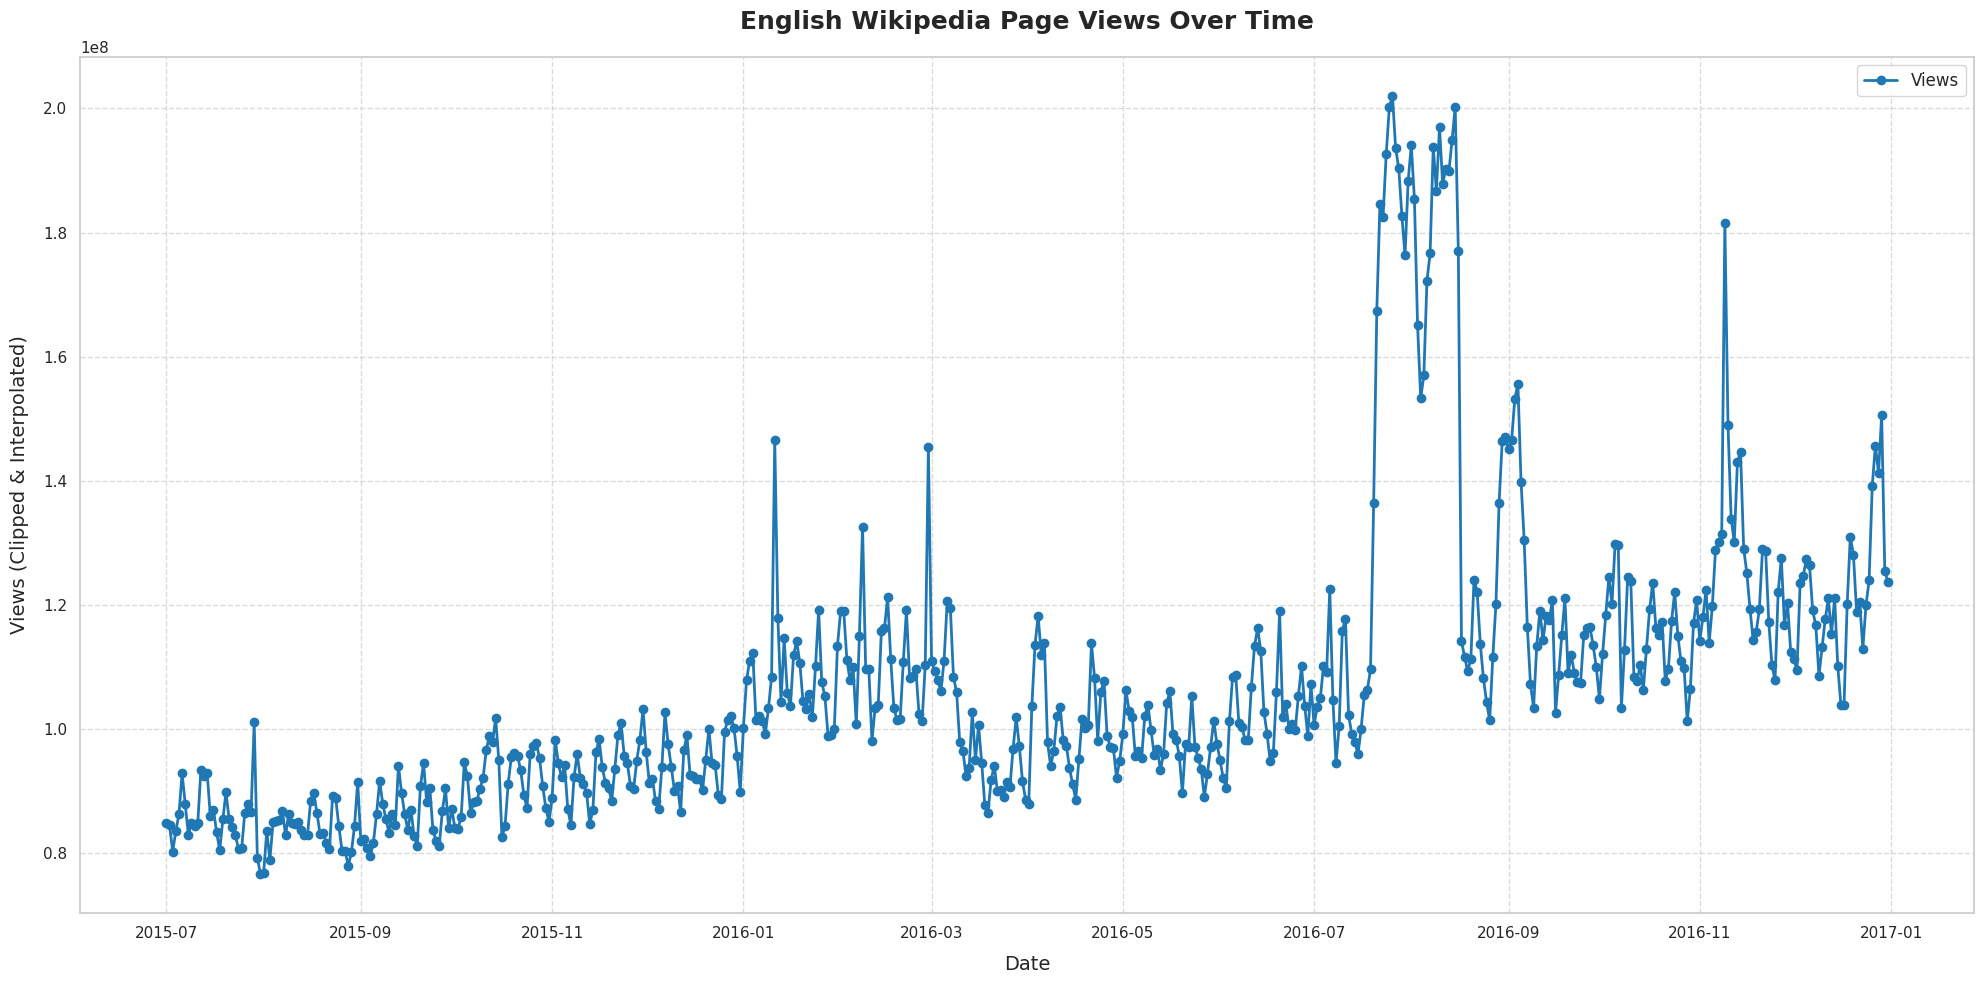

In [30]:
sns.set(style="whitegrid")
# Plot with enhancements
plt.figure(figsize=(20, 10))
plt.plot(df_eng.index, df_eng.views, marker='o', linestyle='-', color='#1f77b4', markersize=6, linewidth=2, label='Views')
# Customize labels, title, and legend
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("Views (Clipped & Interpolated)", fontsize=14, labelpad=10)
plt.title("English Wikipedia Page Views Over Time", fontsize=18, fontweight="bold", pad=20)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
# Display the plot
plt.tight_layout()
plt.show()

### AutoCorrelation

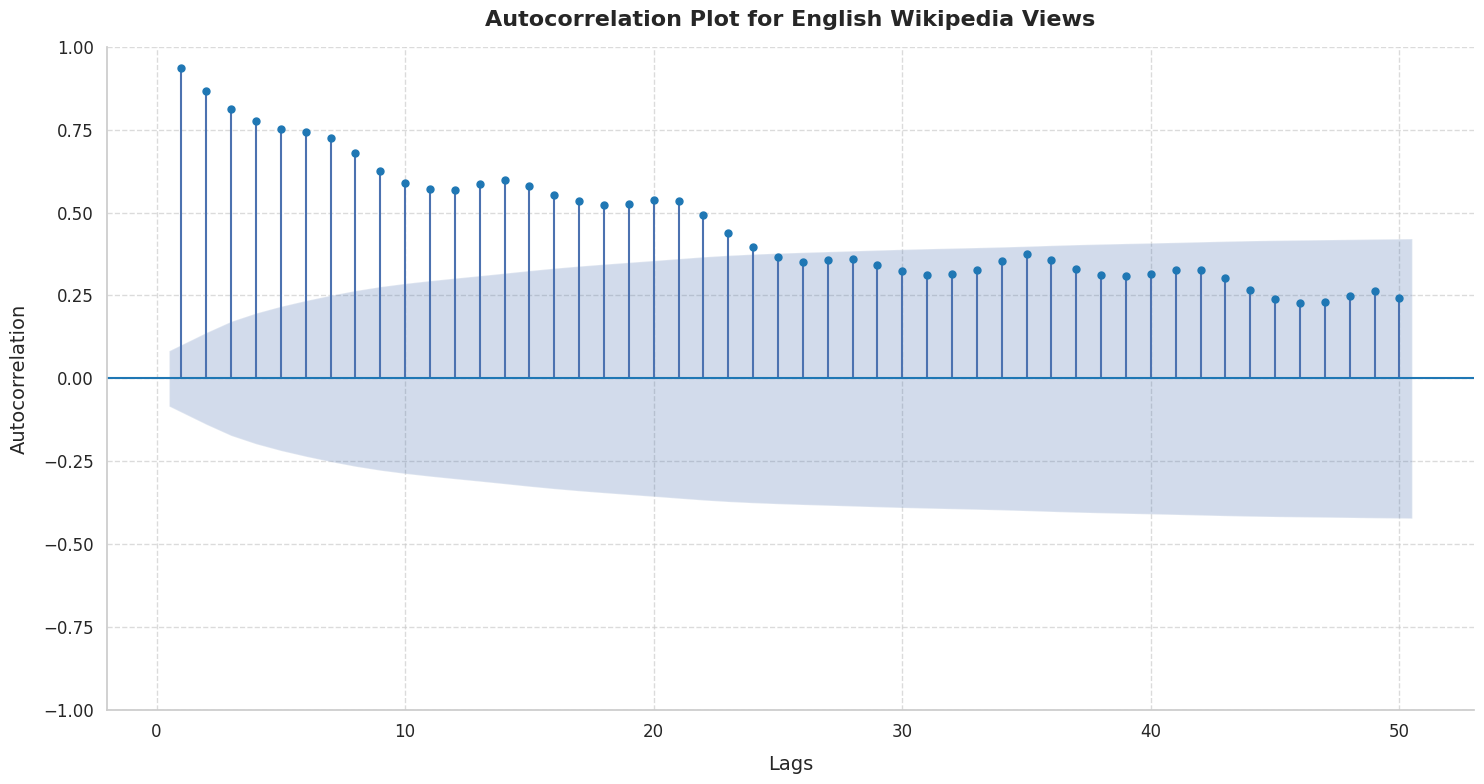

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df_eng.views, ax=ax, lags=50, alpha=0.05, zero=False, color='#1f77b4')
ax.set_title("Autocorrelation Plot for English Wikipedia Views", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Lags", fontsize=14, labelpad=10)
ax.set_ylabel("Autocorrelation", fontsize=14, labelpad=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
sns.despine()
plt.tight_layout()
plt.show()

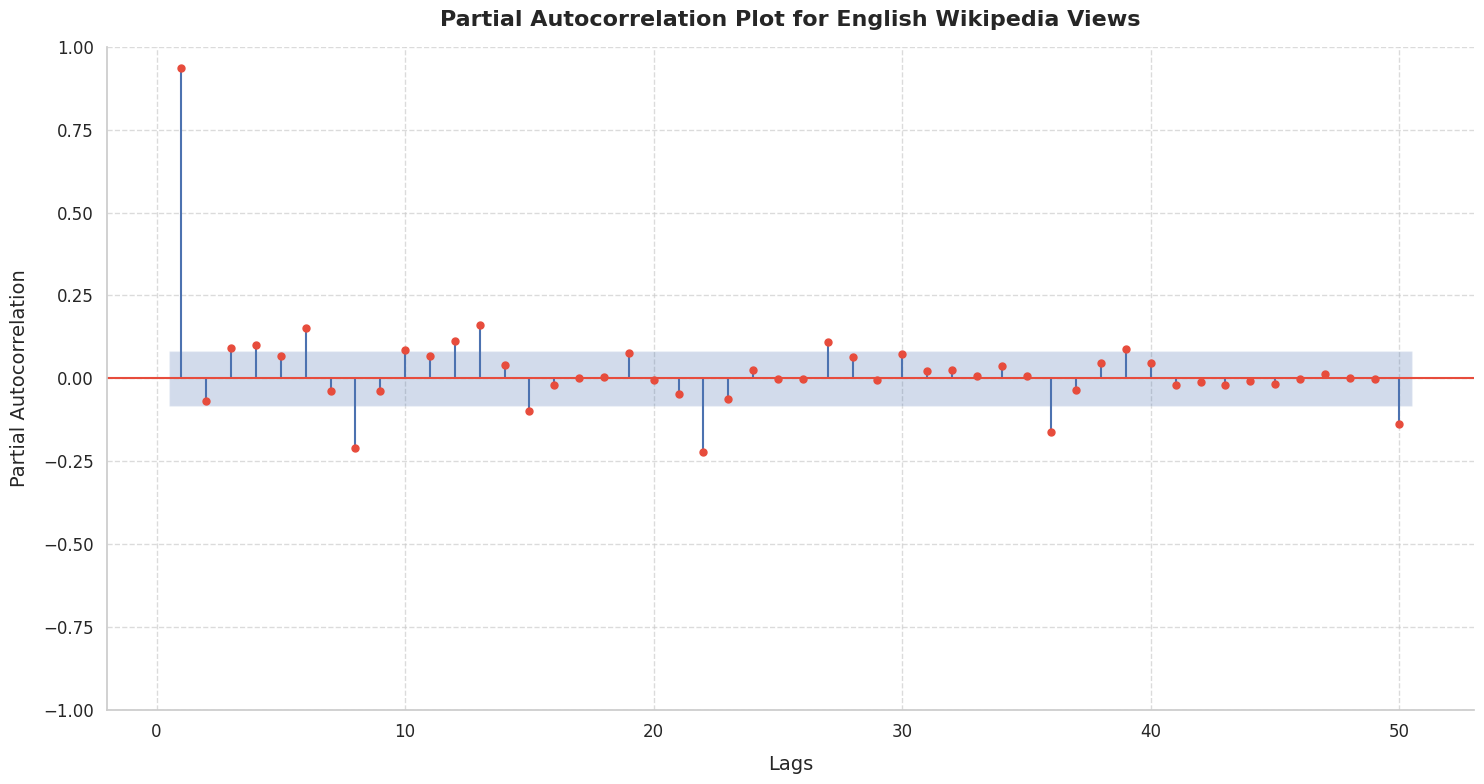

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
plot_pacf(df_eng.views, ax=ax, lags=50, alpha=0.05, zero=False, color='#e74c3c')

# Customize the plot
ax.set_title("Partial Autocorrelation Plot for English Wikipedia Views", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Lags", fontsize=14, labelpad=10)
ax.set_ylabel("Partial Autocorrelation", fontsize=14, labelpad=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
sns.despine()
plt.tight_layout()
plt.show()

## ADFuller Test

In [54]:
import statsmodels.api as sm

def adf_test(series):
    p_value = sm.tsa.adfuller(series)[1]

    if p_value <= 0.05:
        print(f"✅ The series is stationary (p-value = {p_value:.4f})")
    else:
        print(f"❌ The series is NOT stationary (p-value = {p_value:.4f})")

# Perform the ADF test on your data
adf_test(df_eng['views'])

❌ The series is NOT stationary (p-value = 0.1895)


## The initial check shows that the time series is not stationary, so we need to transform it into a stationary series to improve the accuracy of our models

In [55]:
# Create a differenced version of the time series to achieve stationarity
df_eng_st = df_eng.copy()
df_eng_st['views'] = df_eng_st['views'].diff(periods=1)  # Apply first-order differencing
df_eng_st.dropna(inplace=True)  # Remove NaN values resulting from differencing
# Perform the ADF test on the differenced series
print("Performing ADF test on the differenced series...")
adf_test(df_eng_st['views'])

Performing ADF test on the differenced series...
✅ The series is stationary (p-value = 0.0000)


## Differencing has successfully transformed the time series into a stationary series, making it suitable for forecasting.

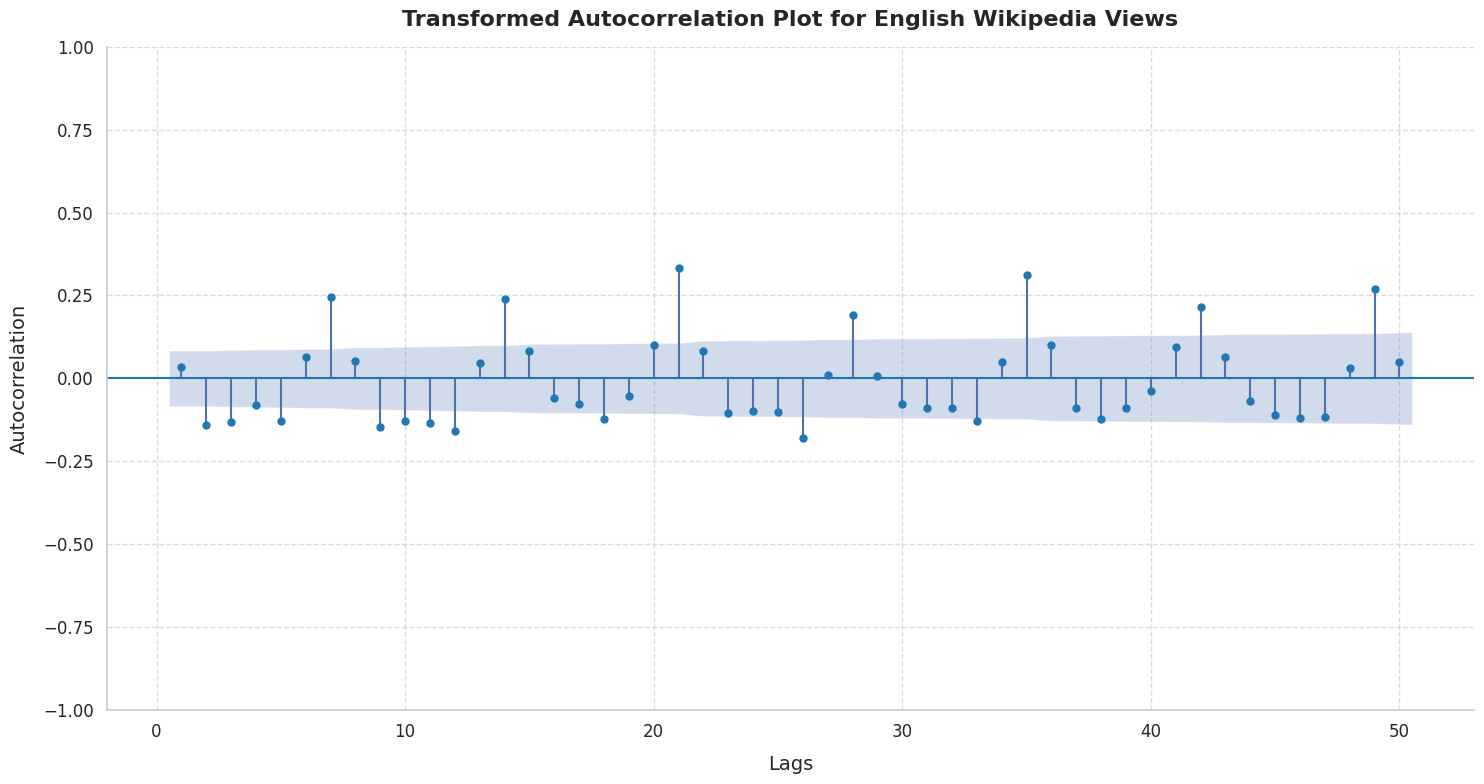

In [58]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df_eng_st.views, ax=ax, lags=50, alpha=0.05, zero=False, color='#1f77b4')
ax.set_title("Transformed Autocorrelation Plot for English Wikipedia Views", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Lags", fontsize=14, labelpad=10)
ax.set_ylabel("Autocorrelation", fontsize=14, labelpad=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
sns.despine()
plt.tight_layout()
plt.show()

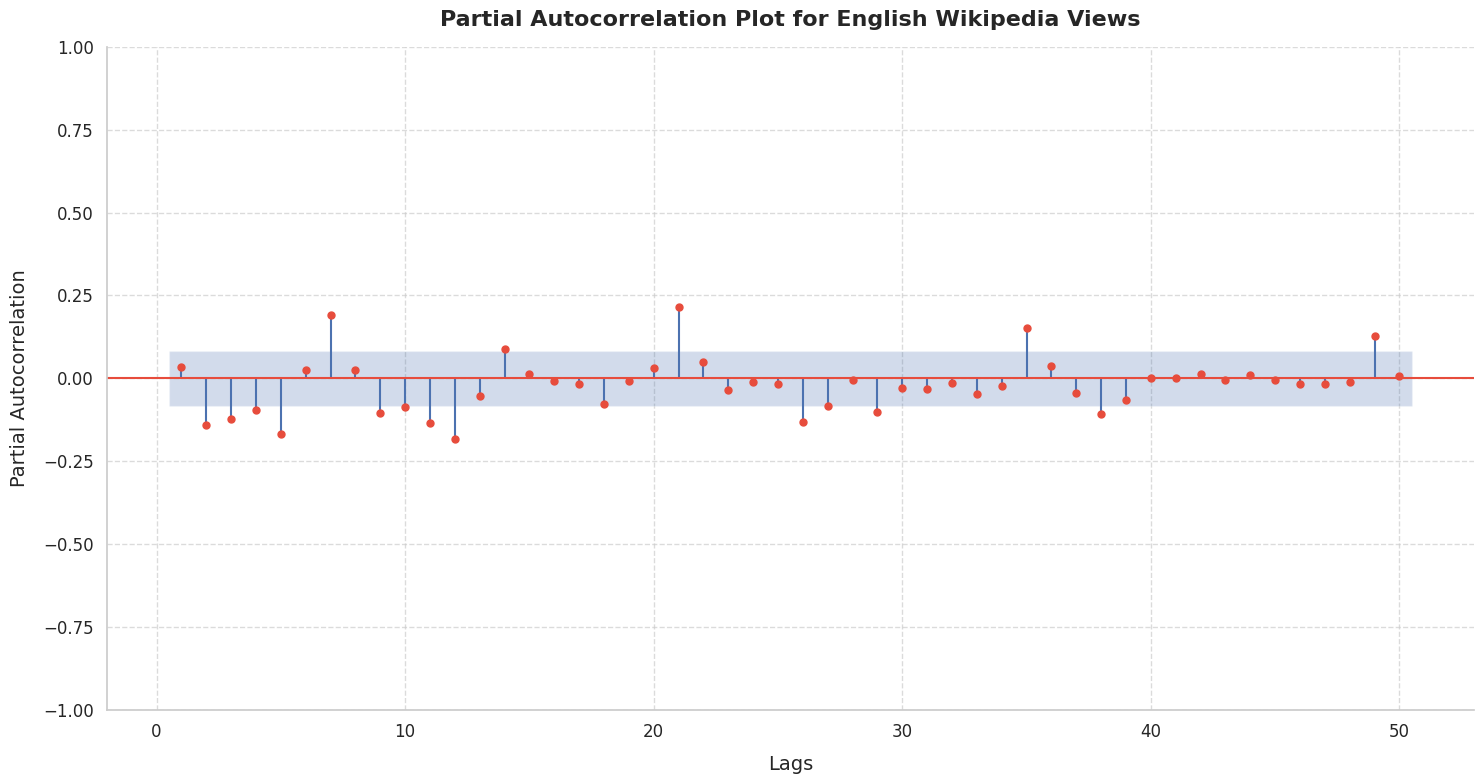

In [59]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
plot_pacf(df_eng_st.views, ax=ax, lags=50, alpha=0.05, zero=False, color='#e74c3c')

# Customize the plot
ax.set_title("Partial Autocorrelation Plot for English Wikipedia Views", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Lags", fontsize=14, labelpad=10)
ax.set_ylabel("Partial Autocorrelation", fontsize=14, labelpad=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
sns.despine()
plt.tight_layout()
plt.show()

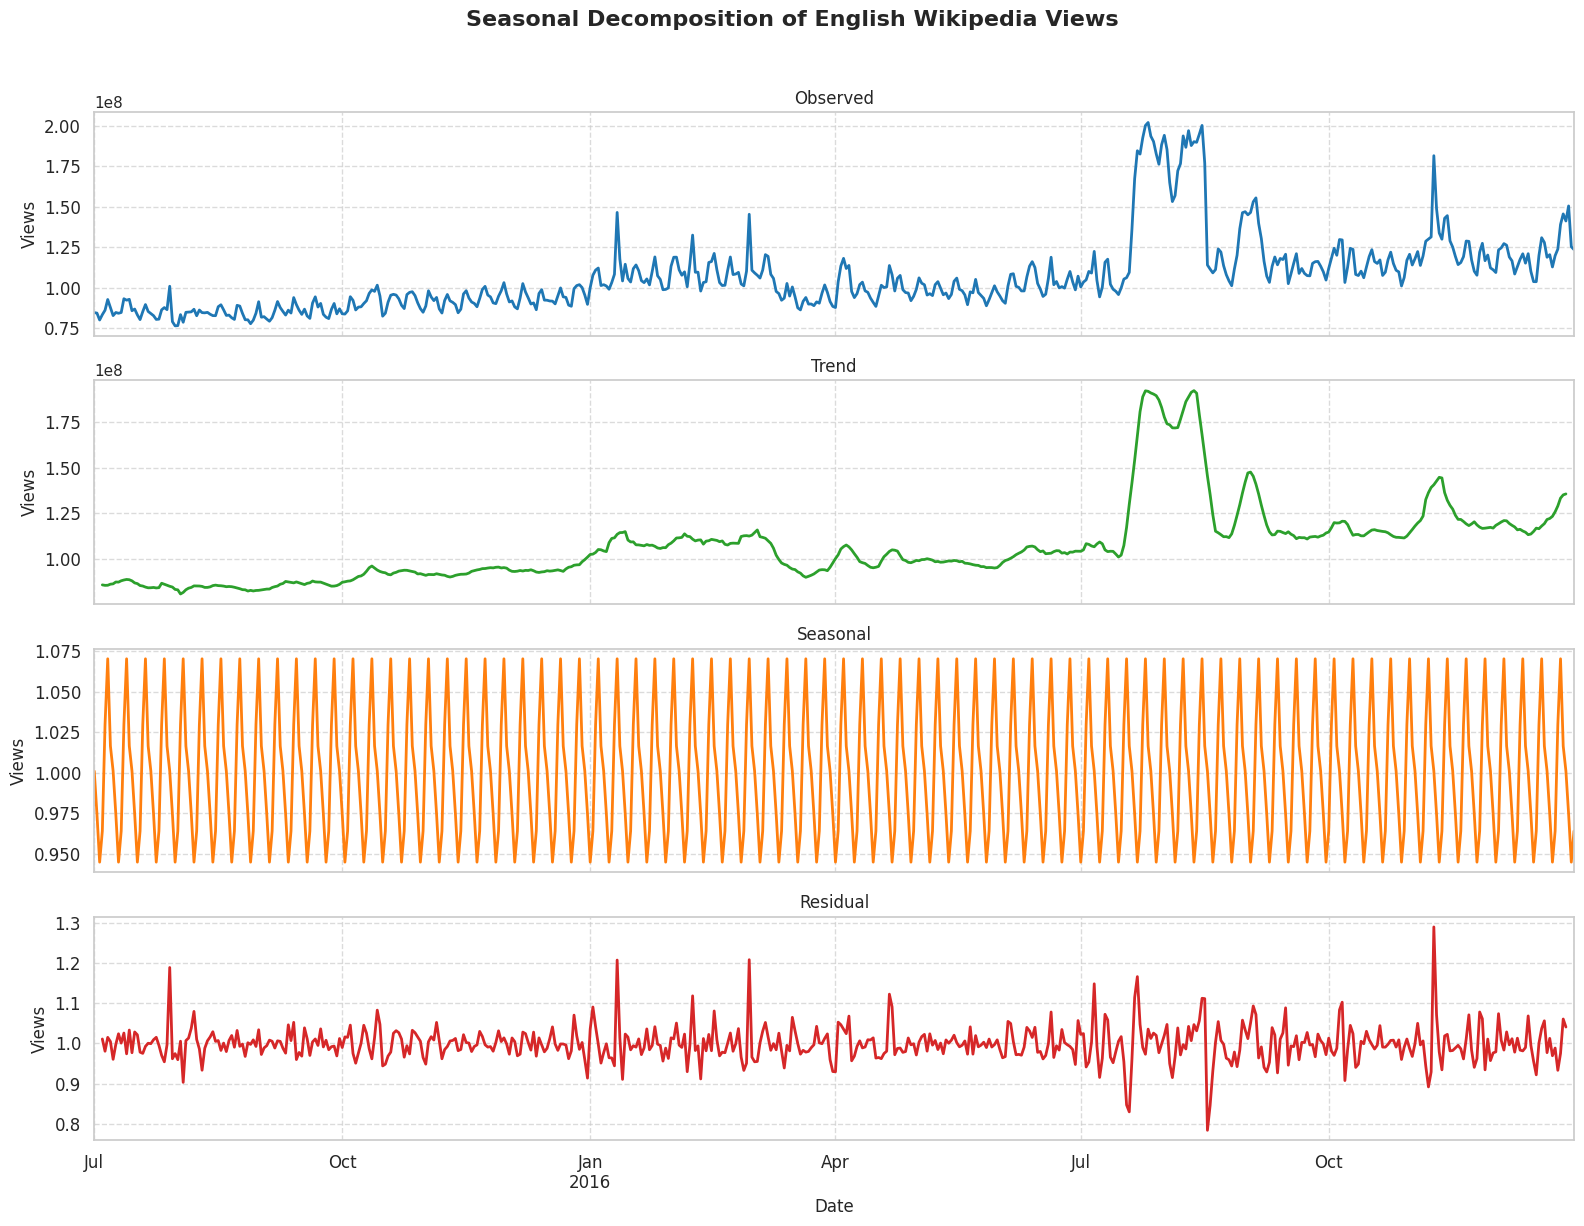

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="whitegrid")
result = seasonal_decompose(df_eng['views'], model='multiplicative')
# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
result.observed.plot(ax=axes[0], color="#1f77b4", title="Observed", linewidth=2)
result.trend.plot(ax=axes[1], color="#2ca02c", title="Trend", linewidth=2)
result.seasonal.plot(ax=axes[2], color="#ff7f0e", title="Seasonal", linewidth=2)
result.resid.plot(ax=axes[3], color="#d62728", title="Residual", linewidth=2)
# Customize the plots
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylabel("Views", fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
# Set a common title
fig.suptitle("Seasonal Decomposition of English Wikipedia Views", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## ARIMA Model

In [69]:
df_eng.shape

(550, 1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17830.707, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17843.713, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17845.183, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17845.009, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17841.753, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17828.725, Time=1.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17835.376, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17836.795, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17830.718, Time=0.70 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=17829.891, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17828.846, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=17826.309, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=17833.465, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]  

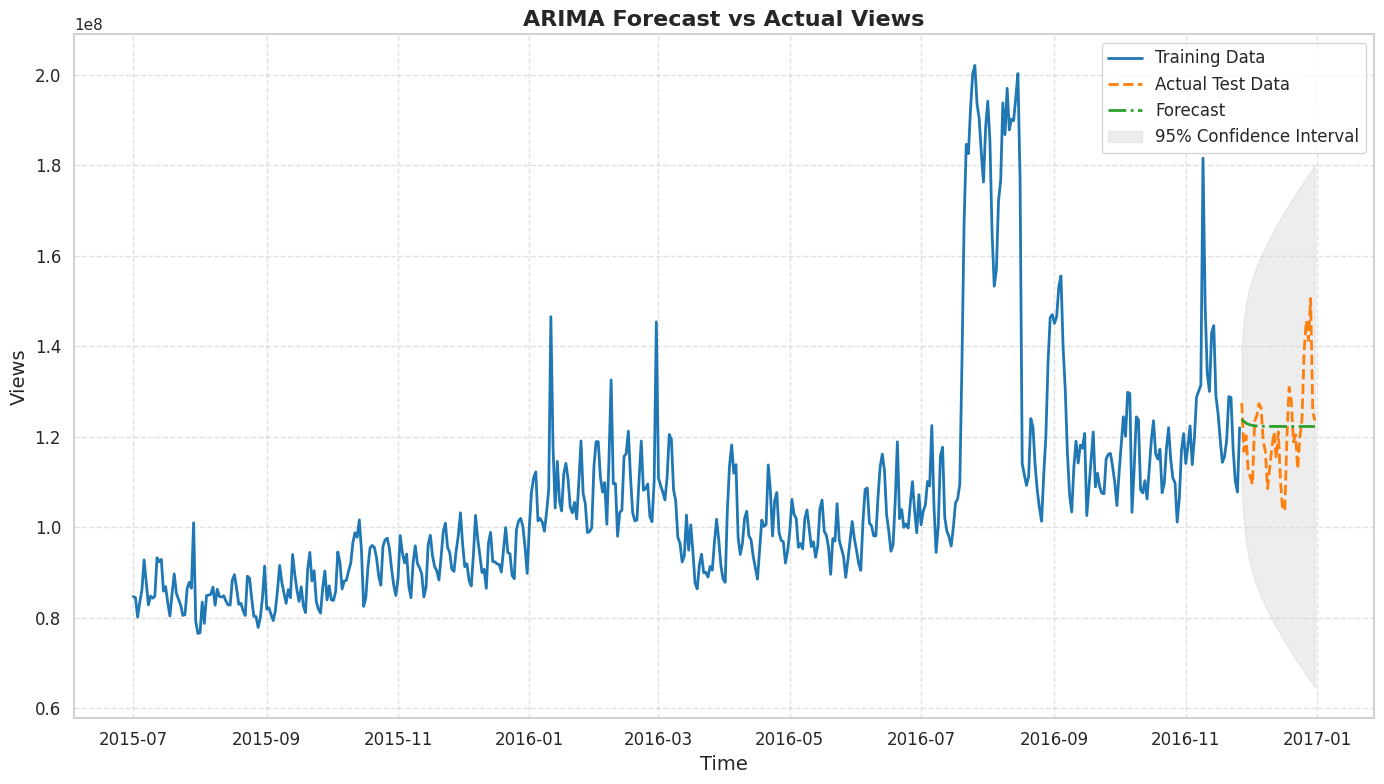

Model Performance Metrics:
  ✅ MAE  : 8067911.564
  ✅ RMSE : 10643074.853
  ✅ MAPE : 0.066
----------------------------------------


In [78]:
!pip install pmdarima
import pandas as pd
import pmdarima as pm
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)
import matplotlib.pyplot as plt

# Custom performance evaluation function
def performance(actual, predicted):
    print("Model Performance Metrics:")
    print(f"  ✅ MAE  : {round(mae(actual, predicted), 3)}")
    print(f"  ✅ RMSE : {round(mse(actual, predicted) ** 0.5, 3)}")
    print(f"  ✅ MAPE : {round(mape(actual, predicted), 3)}")
    print("-" * 40)

# Split the data (515 rows for training, remaining for testing)
train_size = 515
train, test = df_eng['views'][:train_size], df_eng['views'][train_size:]

# Fit auto_arima on the training set
model = pm.auto_arima(train,
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      trace=True)

# Summary of the best ARIMA model
print(model.summary())

# Forecast the next 35 values (same length as the test set)
n_forecast = len(test)
forecast, conf_int = model.predict(n_periods=n_forecast, return_conf_int=True)

# Plot actual vs forecasted values (Enhanced)
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Training Data', color='#1f77b4', linewidth=2)
plt.plot(test.index, test, label='Actual Test Data', color='#ff7f0e', linestyle='--', linewidth=2)
plt.plot(test.index, forecast, label='Forecast', color='#2ca02c', linestyle='-.', linewidth=2)
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 color='lightgray', alpha=0.4, label='95% Confidence Interval')

# Customizing the plot
plt.xlabel('Time', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.title('ARIMA Forecast vs Actual Views', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Evaluate the forecast using performance metrics
performance(test, forecast)

## SARIMA Model

Best SARIMA params: (1, 1, 2), Seasonal params: (0, 1, 1, 7), AIC: 17268.19166403674


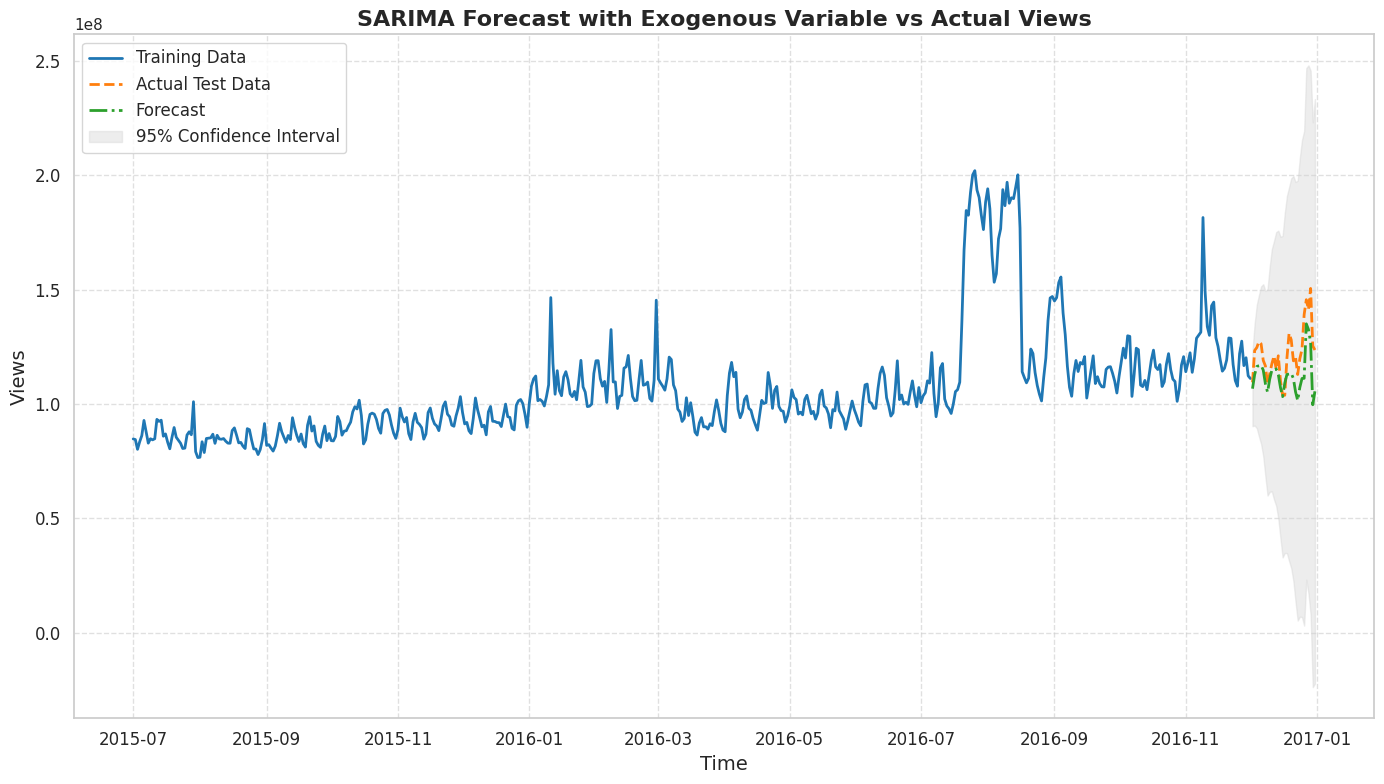

Model Performance Metrics:
  ✅ MAE  : 9983413.102
  ✅ RMSE : 12211002.335
  ✅ MAPE : 7.902%
----------------------------------------


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import itertools

# Split the data (520 rows for training, remaining for testing)
train_size = 520
train, test = df_eng[:train_size], df_eng[train_size:]

# Convert the exogenous variable to a NumPy array
ex = exog['Exog'].to_numpy()

# Split the exogenous variable
ex_train, ex_test = ex[:train_size], ex[train_size:]

# Custom performance evaluation function
def mape(actual, predicted):
    """Calculate Mean Absolute Percentage Error."""
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# SARIMA parameter selection using grid search
p = d = q = range(0, 3)
seasonal_p = seasonal_d = seasonal_q = range(0, 2)
s = 7  # Assuming weekly seasonality; adjust this based on your data

param_combinations = list(itertools.product(p, d, q))
seasonal_param_combinations = [(x[0], x[1], x[2], s) for x in itertools.product(seasonal_p, seasonal_d, seasonal_q)]

best_aic = np.inf
best_params = None
best_seasonal_params = None

# Grid search to find the best parameters
for param in param_combinations:
    for seasonal_param in seasonal_param_combinations:
        try:
            model = SARIMAX(train['views'],
                           order=param,
                           seasonal_order=seasonal_param,
                           exog=ex_train,
                           enforce_stationarity=False,
                           enforce_invertibility=False)
            result = model.fit(disp=False)
            if result.aic < best_aic:
                best_aic = result.aic
                best_params = param
                best_seasonal_params = seasonal_param
        except Exception:
            continue

print(f"Best SARIMA params: {best_params}, Seasonal params: {best_seasonal_params}, AIC: {best_aic}")

# Build the SARIMA model using the best parameters
model = SARIMAX(train['views'],
               order=best_params,
               seasonal_order=best_seasonal_params,
               exog=ex_train,
               enforce_stationarity=False,
               enforce_invertibility=False)
result = model.fit(disp=False)

# Forecasting
forecast_result = result.get_forecast(steps=len(test), exog=ex_test)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)

# Plot actual vs forecasted values with confidence intervals
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['views'], label='Training Data', color='#1f77b4', linewidth=2)
plt.plot(test.index, test['views'], label='Actual Test Data', color='#ff7f0e', linestyle='--', linewidth=2)
plt.plot(test.index, forecast, label='Forecast', color='#2ca02c', linestyle='-.', linewidth=2)
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgray', alpha=0.4, label='95% Confidence Interval')

# Customize the plot
plt.xlabel('Time', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.title('SARIMA Forecast with Exogenous Variable vs Actual Views', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

# Evaluate the forecast using performance metrics
performance(test['views'].values, forecast.values)


##FB Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q26hsi4/ar_5lbxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q26hsi4/tjl3jj5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84249', 'data', 'file=/tmp/tmp2q26hsi4/ar_5lbxs.json', 'init=/tmp/tmp2q26hsi4/tjl3jj5n.json', 'output', 'file=/tmp/tmp2q26hsi4/prophet_modelu5ql5zv8/prophet_model-20250210075527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


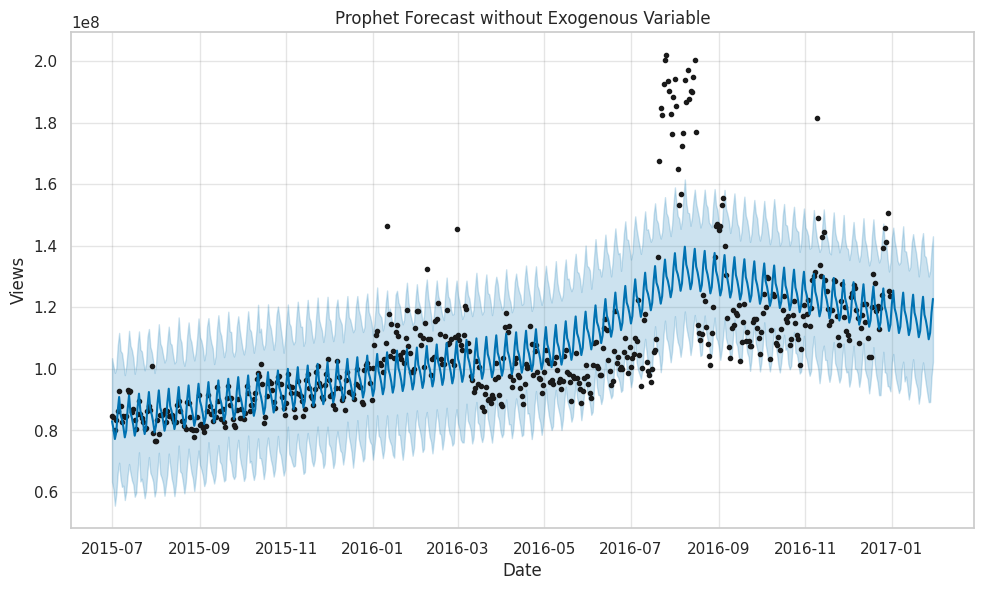

Model Performance Metrics:
  ✅ MAE  : 10870936.424
  ✅ RMSE : 14526242.803
  ✅ MAPE : 8.611%
----------------------------------------


In [98]:
# Prepare the data for Prophet
df_prophet = df_eng[['views']].reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for dates and 'y' for values

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=len(test), freq='D')

# Forecast
forecast = model.predict(future)

# Extract the predicted values for the test period
predicted = forecast['yhat'].iloc[-len(test):].values
actual = test['views'].values

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast without Exogenous Variable')
plt.xlabel('Date')
plt.ylabel('Views')
plt.show()

# Custom performance evaluation function
def mape(actual, predicted):
    """Calculate Mean Absolute Percentage Error."""
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def performance(actual, predicted):
    """Evaluate performance with MAE, RMSE, and MAPE."""
    print("Model Performance Metrics:")
    print(f"  ✅ MAE  : {round(mae(actual, predicted), 3)}")
    print(f"  ✅ RMSE : {round(mse(actual, predicted) ** 0.5, 3)}")
    print(f"  ✅ MAPE : {round(mape(actual, predicted), 3)}%")
    print("-" * 40)

# Display performance metrics
performance(actual, predicted)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q26hsi4/pxx60nqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2q26hsi4/dt48q86e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94492', 'data', 'file=/tmp/tmp2q26hsi4/pxx60nqg.json', 'init=/tmp/tmp2q26hsi4/dt48q86e.json', 'output', 'file=/tmp/tmp2q26hsi4/prophet_modell8a83hy_/prophet_model-20250210075930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Performance Metrics:
  ✅ MAE  : 9058842.775
  ✅ RMSE : 11719708.492
  ✅ MAPE : 7.415%
----------------------------------------


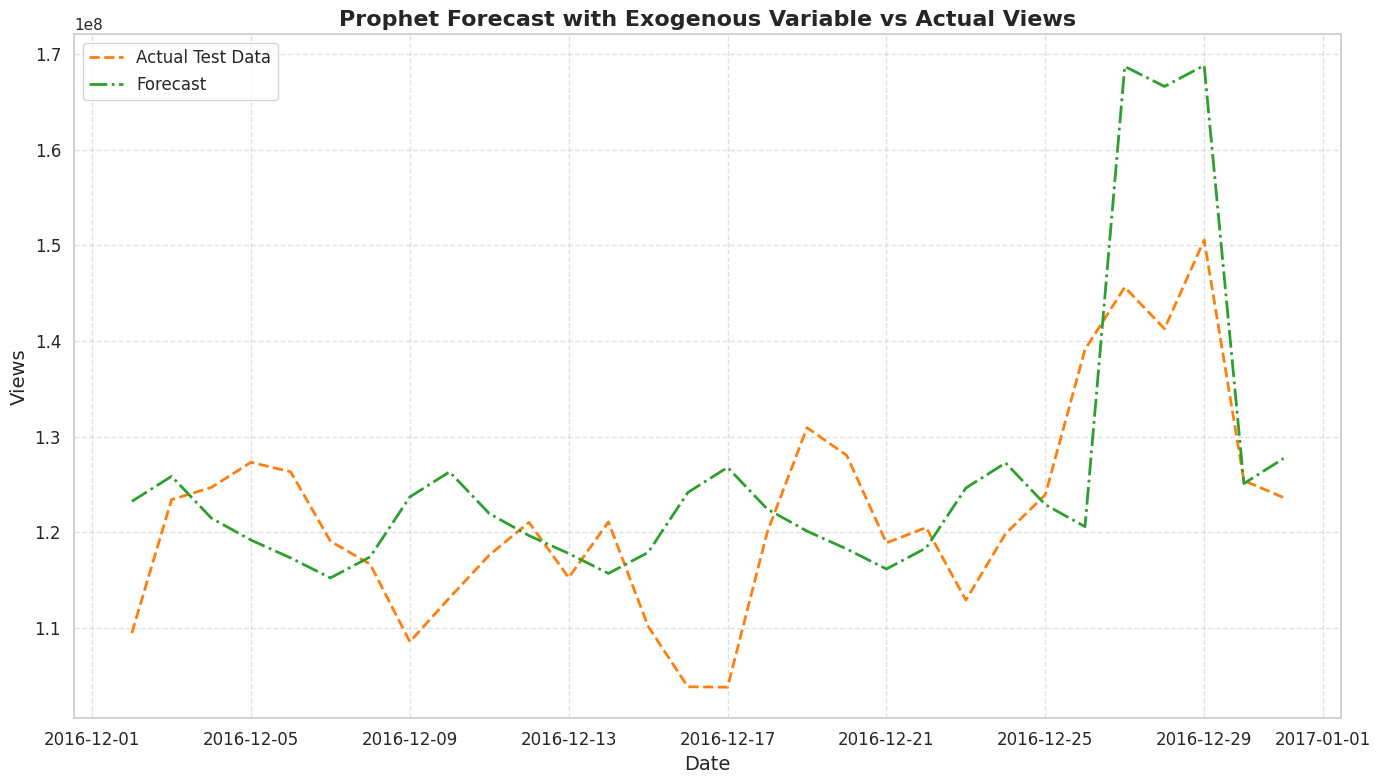

In [102]:
from prophet import Prophet

# Prepare the data for Prophet with an exogenous variable
df_prophet = df_eng[['views']].reset_index()
df_prophet['extra'] = ex[:len(df_eng)]  # Add the exogenous variable from exog to match df_eng length
df_prophet.columns = ['ds', 'y', 'extra']

# Initialize the model and add the exogenous variable
model = Prophet()
model.add_regressor('extra')

# Fit the model
model.fit(df_prophet)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=len(test), freq='D')

# Add the exogenous variable for future periods
future['extra'] = np.concatenate([ex[:len(df_eng)], ex[-len(test):]])

# Forecast
forecast = model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast['yhat'].iloc[-len(test):].values
actual = test['views'].values

# Display performance metrics
performance(actual, predicted)

# Plot the forecast
plt.figure(figsize=(14, 8))
plt.plot(test.index, actual, label='Actual Test Data', color='#ff7f0e', linestyle='--', linewidth=2)
plt.plot(test.index, predicted, label='Forecast', color='#2ca02c', linestyle='-.', linewidth=2)
plt.title('Prophet Forecast with Exogenous Variable vs Actual Views', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()